In [39]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from tensorflow.keras import models, layers, regularizers, metrics
from sklearn.model_selection import train_test_split
from sklearn import metrics as met
from imblearn.over_sampling import SMOTE


In [2]:
# loading
y = np.genfromtxt('./data/label.csv',delimiter=',')

In [3]:
X = np.genfromtxt('./data/features.csv',delimiter=',')

In [4]:
#splitting
x_train, x_val, y_train, y_val = train_test_split(X,
                                                 y,
                                                 test_size = .2,
                                                 random_state=12)

In [5]:
# resampling the traninging data to change the balnce the data
sm = SMOTE(random_state=12)
x_res, y_res = sm.fit_sample(x_train, y_train)

In [13]:
# turning the array to tensors
y_train_res = tf.convert_to_tensor(y_res, dtype='float32')
x_train_res = tf.convert_to_tensor(x_res, dtype='float32')

In [14]:
X_val = tf.convert_to_tensor(x_val, dtype='float32')
Y_val = tf.convert_to_tensor(y_val, dtype='float32')

In [15]:
# makeing the tensorflow data 
data_train = tf.data.Dataset.from_tensor_slices(
    (x_train_res, y_train_res)

).cache()

data_validate = tf.data.Dataset.from_tensor_slices(
    (X_val, Y_val)).cache()

In [41]:
metrics.B


<module 'tensorflow.keras.metrics' from '/usr/local/lib/python3.8/site-packages/tensorflow/keras/metrics/__init__.py'>

In [16]:
X[0].shape

(18,)

In [21]:
model = models.Sequential()
model.add(layers.Flatten(input_shape=(18, 1, 1)))
model.add(layers.Dense(18, activation='relu'))
model.add(layers.Dense(9, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (None, 18)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 18)                342       
_________________________________________________________________
dense_9 (Dense)              (None, 9)                 171       
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 10        
Total params: 523
Trainable params: 523
Non-trainable params: 0
_________________________________________________________________


In [22]:
history = model.fit(data_train.shuffle(10000).batch(32), epochs=30, validation_data=data_validate.batch(32))

Epoch 1/30
574/574 [==============================] - 1s 2ms/step - loss: 0.5912 - accuracy: 0.6955 - val_loss: 0.6835 - val_accuracy: 0.6450
Epoch 2/30
574/574 [==============================] - 1s 2ms/step - loss: 0.4109 - accuracy: 0.8298 - val_loss: 0.4325 - val_accuracy: 0.8107
Epoch 3/30
574/574 [==============================] - 1s 2ms/step - loss: 0.2782 - accuracy: 0.8881 - val_loss: 0.2830 - val_accuracy: 0.8777
Epoch 4/30
574/574 [==============================] - 1s 2ms/step - loss: 0.2147 - accuracy: 0.9235 - val_loss: 0.2456 - val_accuracy: 0.9077
Epoch 5/30
574/574 [==============================] - 1s 2ms/step - loss: 0.1907 - accuracy: 0.9318 - val_loss: 0.2386 - val_accuracy: 0.9090
Epoch 6/30
574/574 [==============================] - 1s 2ms/step - loss: 0.1815 - accuracy: 0.9362 - val_loss: 0.2325 - val_accuracy: 0.9147
Epoch 7/30
574/574 [==============================] - 1s 2ms/step - loss: 0.1767 - accuracy: 0.9382 - val_loss: 0.1968 - val_accuracy: 0.9310
Epoch 

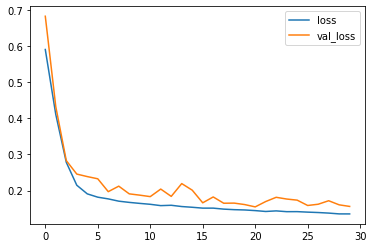

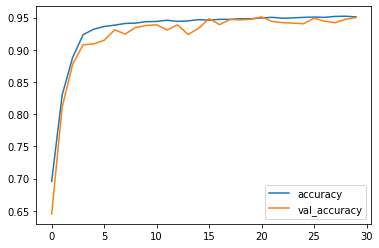

In [23]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.close()

plt.plot(model.history.history['accuracy'], label='accuracy')
plt.plot(model.history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()
plt.close()

In [28]:
np.hstack([model.predict(X_val), Y_val[:,np.newaxis]])

array([[0.02165315, 0.        ],
       [0.9912787 , 1.        ],
       [0.00163436, 0.        ],
       ...,
       [0.0210996 , 0.        ],
       [0.09554723, 1.        ],
       [0.93568766, 1.        ]], dtype=float32)

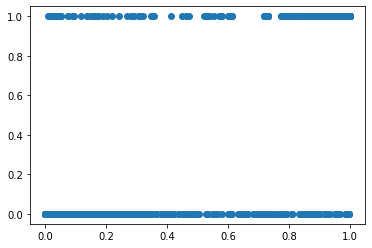

In [29]:
plt.scatter(model.predict(X_val), Y_val)

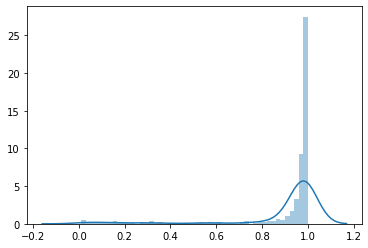

In [31]:
sns.distplot(model.predict(X_val)[Y_val==1])

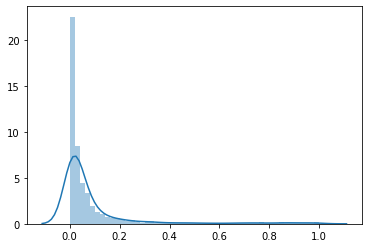

In [32]:
sns.distplot(model.predict(X_val)[Y_val==0])

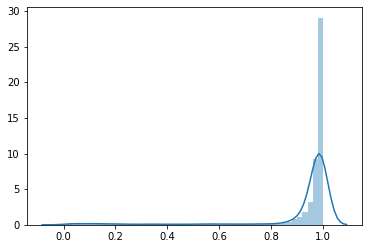

In [33]:
sns.distplot(model.predict(x_train_res)[y_train_res==1])

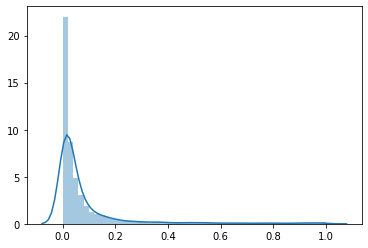

In [34]:
sns.distplot(model.predict(x_train_res)[y_train_res==0])

In [40]:
#roc auc
met.roc_auc_score(Y_val,model.predict(X_val))

0.9801139613360788